# Traffic Sign Classification with Keras

Keras exists to make coding deep neural networks simpler. To demonstrate just how easy it is, you’re going to use Keras to build a convolutional neural network in a few dozen lines of code.

You’ll be connecting the concepts from the previous lessons to the methods that Keras provides.

## Dataset

The network you'll build with Keras is similar to the example that you can find in Keras’s GitHub repository that builds out a [convolutional neural network for MNIST](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py). 

However, instead of using the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, you're going to use the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news) dataset that you've used previously.

You can download pickle files with sanitized traffic sign data here.

## Overview

Here are the steps you'll take to build the network:

1. First load the data.
2. Build a feedforward neural network to classify traffic signs.
3. Build a convolutional neural network to classify traffic signs.

Keep an eye on the network’s accuracy over time. Once the accuracy reaches the 98% range, you can be confident that you’ve built and trained an effective model.

## Load the Data

Start by importing the data from the pickle file.

In [1]:
import keras
import pickle
import numpy as np
import sklearn

Using TensorFlow backend.


In [2]:
# TODO: Implement load the data here.
with open('train.p', 'rb') as f:
    dataset_train_raw = pickle.load(f)  


X_raw = dataset_train_raw['features']

y_raw = dataset_train_raw['labels']

y_raw_ClassIdLs = list(set(y_raw)) #list of all class id
y_raw_ClassNum = len(y_raw_ClassIdLs)

y_ClassNum = y_raw_ClassNum

y_raw_OneHot_ver0 = np.eye(y_ClassNum)[y_raw]
y_raw_OneHot = np.eye(y_ClassNum)[y_raw]



X_train = X_raw
y_train = y_raw
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert (X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels. \n X_train length: {} \n y_train length: {}".format(X_train.shape[0], y_train.shape[0])
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

print("Input Shape: {}".format(X_raw.shape))

Input Shape: (39209, 32, 32, 3)


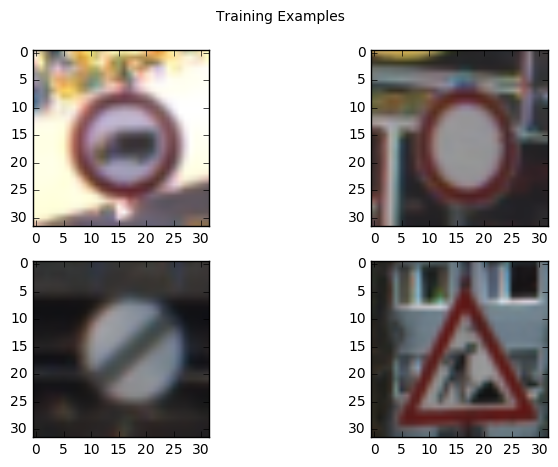

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np

# plot training examples

def findRandomTrainingImage():
    idx = int(X_raw.shape[0] * np.random.random())
    image_np = np.array(X_raw[idx])
    return image_np
    

plt.rcParams['figure.figsize'] = (8, 5) # width, height

plt.figure(1)
plt.suptitle('Training Examples')

plt.subplot(221)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(222)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(223)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(224)
img = findRandomTrainingImage()
plt.imshow(img)

plt.show()

## Normalize the data

Now that you've loaded the training data, normalize the input so that it has a mean of 0 and a range between -0.5 and 0.5.

In [4]:
# normalize over image mean
def KerasLab_nomalizeImageDataset(dataset):
    dataset_flt = np.ndarray.astype(dataset, 'float64')
    num = dataset_flt.shape[0]
    for i in range(num):
        data_mean_flt = np.mean(dataset_flt[i])
        dataset_flt[i] = np.subtract(dataset_flt[i], data_mean)/(data_mean*2)
    return dataset_flt
        
#  faster to normalize over global mean
def KerasLab_nomalizeGlobalDataset(dataset):
    mean = np.mean(dataset)
    
    return (dataset - mean)/(mean*2)

In [5]:
# TODO: Implement data normalization here.



X_raw_norm = KerasLab_nomalizeGlobalDataset(X_raw)

# import cv2
# cv2.normalize(X_train,X_train, alpha = -0.5, beta = 5, norm_type=cv2.NORM_L2  )
# import sklearn
# X_train = sklearn.preprocessing.normalize(X_train_raw)

# X_train_norm = np.linalg.norm(X_train_raw, axis = 3)
# X_train_norm = ( X_train_raw - min(X_train_raw) ) / ( max(X_train_raw) - min(X_train_raw) )


X_train = X_raw_norm


# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(round(np.mean(X_train)) == 0), "The mean of the input data is: %f" % np.mean(X_train)
# assert(np.min(X_train) == -0.5 and np.max(X_train) == 0.5), "The range of the input data is: %.3f to %.3f" % (np.min(X_train), np.max(X_train))

In [6]:
# cross validation preprocessing

import sklearn.model_selection

X_Train, X_Vali, y_Train_OneHot ,y_Vali_OneHot =  \
            sklearn.model_selection.train_test_split(X_raw_norm, 
                                                     y_raw_OneHot, 
                                                     train_size= 0.75, 
                                                     stratify = y_raw_OneHot 
                                                    )


X_train = X_Train
y_train = y_Train_OneHot
X_val = X_Vali

## Build a Two-Layer Feedfoward Network

The code you've written so far is for data processing, not specific to Keras. Here you're going to build Keras-specific code.

Build a two-layer feedforward neural network, with 128 neurons in the fully-connected hidden layer. 

To get started, review the Keras documentation about [models](https://keras.io/models/sequential/) and [layers](https://keras.io/layers/core/).

The Keras example of a [Multi-Layer Perceptron](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) network is similar to what you need to do here. Use that as a guide, but keep in mind that there are a number of differences.

In [7]:
# TODO: Build a two-layer feedforward neural network with Keras here.
from keras.models import Sequential

model = Sequential()

In [8]:
from keras.layers import Dense, Activation

Layer_Fc0_OutputLength = 128
Layer_Fc0_InputLength =  32*32*3

Layer_Fc1_OutputLength = y_ClassNum

model.add(Dense(Layer_Fc0_OutputLength, input_dim = Layer_Fc0_InputLength, activation='relu', name="hidden1"))
model.add(Dense(Layer_Fc1_OutputLength, activation='softmax', name="output"))


# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(model.get_layer(name="hidden1").input_shape == (None, 32*32*3)), "The input shape is: %s" % model.get_layer(name="hidden1").input_shape
assert(model.get_layer(name="output").output_shape == (None, 43)), "The output shape is: %s" % model.get_layer(name="output").output_shape 

## Train the Network
Compile and train the network for 2 epochs. [Use the `adam` optimizer, with `categorical_crossentropy` loss.](https://keras.io/models/sequential/)

Hint 1: In order to use categorical cross entropy, you will need to [one-hot encode the labels](https://github.com/fchollet/keras/blob/master/keras/utils/np_utils.py).

Hint 2: In order to pass the input images to the fully-connected hidden layer, you will need to [reshape the input](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py).

Hint 3: Keras's `.fit()` method returns a `History.history` object, which the tests below use. Save that to a variable named `history`.

In [9]:
# TODO: Compile and train the model here.
Klab_Optimizer = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=Klab_Optimizer, metrics=['accuracy'])

In [10]:
X_Train_flatten = X_Train.reshape((-1,Layer_Fc0_InputLength))
X_Vali_flatten = X_Vali.reshape((-1,Layer_Fc0_InputLength))

                                   
# X_raw_norm_flatten = X_raw_norm.reshape((-1,Layer_Fc0_InputLength))

X = X_Train_flatten
y_OneHot = y_Train_OneHot

# history = model.fit(X, y_OneHot, nb_epoch=2, batch_size=64, validation_split=0.25, shuffle=True)
history = model.fit(X, y_OneHot, nb_epoch=2, batch_size=64,  validation_data = (X_Vali_flatten, y_Vali_OneHot) )

# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['acc'][0] > 0.5), "The training accuracy was: %.3f" % history.history['acc'][0]

Train on 29406 samples, validate on 9803 samples
Epoch 1/2
29406/29406 [==============================] - 9s - loss: 1.6254 - acc: 0.5877 - val_loss: 0.9225 - val_acc: 0.7657
Epoch 2/2
29406/29406 [==============================] - 9s - loss: 0.6650 - acc: 0.8389 - val_loss: 0.5100 - val_acc: 0.8892


## Validate the Network
Split the training data into a training and validation set.

Measure the [validation accuracy](https://keras.io/models/sequential/) of the network after two training epochs.

Hint: [Use the `train_test_split()` method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn.

In [11]:
# TODO: Split some of the training data into a validation dataset.
# TODO: Compile and train the model to measure validation accuracy.

assert(round(X_train.shape[0] / float(X_val.shape[0])) == 3), "The training set is %.3f times larger than the validation set." % (X_train.shape[0] / float(X_val.shape[0]))
assert(history.history['val_acc'][0] > 0.6), "The validation accuracy is: %.3f" % history.history['val_acc'][0]

Vali_Accu = np.mean(history.history['val_acc'])
print("Validation Accuracy: {:.2f}%".format(Vali_Accu*100))

Validation Accuracy: 82.75%


## Congratulations
You've built a feedforward neural network in Keras!

Don't stop here! Next, you'll add a convolutional layer to drive.py.

## Convolutions
Build a new network, similar to your existing network. Before the hidden layer, add a 3x3 [convolutional layer](https://keras.io/layers/convolutional/#convolution2d) with 32 filters and valid padding.

Then compile and train the network.

Hint 1: The Keras example of a [convolutional neural network](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py) for MNIST would be a good example to review.

Hint 2: Now that the first layer of the network is a convolutional layer, you no longer need to reshape the input images before passing them to the network. You might need to reload your training data to recover the original shape.

Hint 3: Add a [`Flatten()` layer](https://keras.io/layers/core/#flatten) between the convolutional layer and the fully-connected hidden layer.

In [12]:
from keras import backend as K

print('K.image_dim_ordering() = ', K.image_dim_ordering())


K.image_dim_ordering() =  tf


In [13]:
# TODO: Re-construct the network and add a convolutional layer before the first fully-connected layer.

# input image dimensions
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

KLab_Model_Cnn = Sequential()

Cnn0_InputShape = X_raw.shape[1:]


# Layer_Cnn0 = keras.layers.convolutional.Convolution2D(
#                 nb_filter   = Cnn0_nb_filters,
#                 nb_row      = Cnn0_kernel_size[0],
#                 nb_col      = Cnn0_kernel_size[1],
#                 input_shape = Cnn0_InputShape,

#              )

# KLab_Model_Cnn.add(Layer_Cnn0)

KLab_Model_Cnn.add(Convolution2D(nb_filter= 64, 
                                 nb_row=3,
                                 nb_col=3, 
                                 input_shape = Cnn0_InputShape,
                                 name='cnn0',
                                )
                  )
KLab_Model_Cnn.add(Activation('relu'))


KLab_Model_Cnn.add( MaxPooling2D( pool_size=(2, 2), 
                                  border_mode='valid',
                                  name='cnn0_maxpool',
                                )
                  )

KLab_Model_Cnn.add(Flatten(name='cnn0_flatten'))
KLab_Model_Cnn.add(Dense(128,name='fc0'))
KLab_Model_Cnn.add(Activation('relu'))
KLab_Model_Cnn.add(Dense(y_ClassNum, name='fc7'))

KLab_Model_Cnn.add(Activation('softmax', name="output"))



# TODO: Compile and train the model here.
Klab_Optimizer = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

KLab_Model_Cnn.compile(loss='categorical_crossentropy', optimizer=Klab_Optimizer, metrics=['accuracy'])

In [14]:

assert(KLab_Model_Cnn.get_layer(name="output").output_shape == (None, y_ClassNum)), "The output shape is: %s" % model.get_layer(name="output").output_shape 


print('Input Shape: ', X_Train.shape)
print('cnn0 input: ', KLab_Model_Cnn.get_layer(name="cnn0").input_shape)

print('cnn0: ', KLab_Model_Cnn.get_layer(name="cnn0").output_shape)

print('cnn0_maxpool: ', KLab_Model_Cnn.get_layer(name="cnn0_maxpool").output_shape)
print('cnn0_flatten: ', KLab_Model_Cnn.get_layer(name="cnn0_flatten").output_shape)
print('fc0: ', KLab_Model_Cnn.get_layer(name="fc0").output_shape)
print('fc7: ', KLab_Model_Cnn.get_layer(name="fc7").output_shape)

Input Shape:  (29406, 32, 32, 3)
cnn0 input:  (None, 32, 32, 3)
cnn0:  (None, 30, 30, 64)
cnn0_maxpool:  (None, 15, 15, 64)
cnn0_flatten:  (None, 14400)
fc0:  (None, 128)
fc7:  (None, 43)


In [15]:
# TODO: Compile and train the model.

KLab_Model_Cnn_History = KLab_Model_Cnn.fit(    x=X_Train,
                                 y=y_Train_OneHot,
                                 nb_epoch=2, 
                                 batch_size=64,  
                                 validation_data = (X_Vali, y_Vali_OneHot) 
                               )

history = KLab_Model_Cnn_History
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.9), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]

Train on 29406 samples, validate on 9803 samples
Epoch 1/2
29406/29406 [==============================] - 81s - loss: 1.2393 - acc: 0.6787 - val_loss: 0.4481 - val_acc: 0.8831
Epoch 2/2
29406/29406 [==============================] - 73s - loss: 0.2780 - acc: 0.9359 - val_loss: 0.2268 - val_acc: 0.9452


In [16]:
print("Validation Accuracy: {:.2f}%".format(history.history['val_acc'][-1]*100))

Validation Accuracy: 94.52%


## Pooling
Re-construct your network and add a 2x2 [pooling layer](https://keras.io/layers/pooling/#maxpooling2d) immediately following your convolutional layer.

Then compile and train the network.

In [17]:
#  Re-construct the network and add a pooling layer after the convolutional layer.
#  Compile and train the model.

# input image dimensions
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

KLab_Model_Cnn_PoolTest = Sequential()

Cnn0_InputShape = X_raw.shape[1:]


model = KLab_Model_Cnn_PoolTest

Layer_Cnn0 = keras.layers.convolutional.Convolution2D(
                nb_filter   = 32,
                nb_row      = 3,
                nb_col      = 3,
                input_shape = Cnn0_InputShape,
             )

model.add(Layer_Cnn0)


model.add(Activation('relu'))


model.add( MaxPooling2D(    pool_size=(2, 2), 
                            border_mode='valid',
                            name='cnn0_maxpool',
                        )
                  )

model.add(Flatten(name='cnn0_flatten'))
model.add(Dense(128,name='fc0'))
model.add(Activation('relu'))
model.add(Dense(y_ClassNum, name='fc7'))

model.add(Activation('softmax', name="output"))



# TODO: Compile and train the model here.
Klab_Optimizer = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=Klab_Optimizer, metrics=['accuracy'])

history = model.fit(     x=X_Train,
                         y=y_Train_OneHot,
                         nb_epoch=2, 
                         batch_size=64,  
                         validation_data = (X_Vali, y_Vali_OneHot) 
                   ) 


print("\n\nValidation Accuracy: {:.2f}%".format( history.history['val_acc'][-1]*100))

# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.9), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]



Train on 29406 samples, validate on 9803 samples
Epoch 1/2
29406/29406 [==============================] - 36s - loss: 1.3255 - acc: 0.6644 - val_loss: 0.5199 - val_acc: 0.8556
Epoch 2/2
29406/29406 [==============================] - 38s - loss: 0.3246 - acc: 0.9214 - val_loss: 0.2656 - val_acc: 0.9355


Validation Accuracy: 93.55%


## Dropout
Re-construct your network and add [dropout](https://keras.io/layers/core/#dropout) after the pooling layer. Set the dropout rate to 50%.

In [18]:
#  Re-construct the network and add dropout after the pooling layer.
#  Compile and train the model.


# input image dimensions
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import Convolution2D, MaxPooling2D

KLab_Model_Cnn_DropoutTest = Sequential()

Cnn0_InputShape = X_raw.shape[1:]


model = KLab_Model_Cnn_DropoutTest

Layer_Cnn0 = keras.layers.convolutional.Convolution2D(
                nb_filter   = 32,
                nb_row      = 3,
                nb_col      = 3,
                input_shape = Cnn0_InputShape,
             )

model.add(Layer_Cnn0)

model.add(Activation('relu'))


model.add( MaxPooling2D( pool_size=(2, 2), 
                                  border_mode='valid',
                                  name='cnn0_maxpool',
                                )
                  )

model.add(Flatten(name='cnn0_flatten'))
model.add(Dropout(0.2))
model.add(Dense(128,name='fc0'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_ClassNum, name='fc7'))
model.add(Activation('softmax', name="output"))



# TODO: Compile and train the model here.
Klab_Optimizer = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=Klab_Optimizer, metrics=['accuracy'])

history = model.fit(     x=X_Train,
                         y=y_Train_OneHot,
                         nb_epoch=2, 
                         batch_size=64,  
                         validation_data = (X_Vali, y_Vali_OneHot) 
                   ) 


print("\n\n Validation Accuracy: {:.2f}%".format(history.history['val_acc'][-1]*100))

# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.9), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]


Train on 29406 samples, validate on 9803 samples
Epoch 1/2
29406/29406 [==============================] - 39s - loss: 2.0304 - acc: 0.4600 - val_loss: 0.8389 - val_acc: 0.8329
Epoch 2/2
29406/29406 [==============================] - 42s - loss: 0.8333 - acc: 0.7638 - val_loss: 0.3940 - val_acc: 0.9100


 Validation Accuracy: 91.00%


## Optimization
Congratulations! You've built a neural network with convolutions, pooling, dropout, and fully-connected layers, all in just a few lines of code.

Have fun with the model and see how well you can do! Add more layers, or regularization, or different padding, or batches, or more training epochs.

What is the best validation accuracy you can achieve?

In [41]:
# input image dimensions
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout, GaussianNoise, ActivityRegularization
from keras.layers import Convolution2D, MaxPooling2D

Cnn0_InputShape = X_raw.shape[1:]

KLab_Model_Cnn_Optim = Sequential()

model = KLab_Model_Cnn_Optim

#CNN 0
Layer_Cnn0 = keras.layers.convolutional.Convolution2D(
                nb_filter   = 32,
                nb_row      = 3,
                nb_col      = 3,
                input_shape = Cnn0_InputShape,
             )

model.add(Layer_Cnn0)

model.add(Activation('relu'))

model.add( MaxPooling2D(  pool_size=(2, 2), 
                          border_mode='valid',
                          name='cnn0_maxpool',
                       )
         )

model.add(ActivityRegularization(l1=0.0001, l2=0.0001))

#CNN 1
model.add(Convolution2D( nb_filter= 128, 
                         nb_row=5,
                         nb_col=5, 
                         name='cnn1',
                        )
                  )
model.add(Activation('relu'))
model.add( MaxPooling2D(  pool_size=(3, 3), 
                          border_mode='valid',
                          name='cnn1_maxpool',
                       )
                  )
model.add(ActivityRegularization(l1=0.0001, l2=0.0001))


model.add(Flatten(name='cnn1_flatten'))
model.add(GaussianNoise(0.0001))
model.add(Dropout(0.2))

#FC1
model.add(Dense(512,name='fc0'))
model.add(Activation('relu'))
model.add(Dropout(0.3))

#FC7
model.add(Dense(y_ClassNum, name='fc7'))
model.add(Activation('softmax', name="output"))



# TODO: Compile and train the model here.
Klab_Optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy', optimizer=Klab_Optimizer, metrics=['accuracy'])

In [42]:
print('cnn0_maxpool: ', model.get_layer(name="cnn0_maxpool").output_shape)
print('cnn1_maxpool: ', model.get_layer(name="cnn1_maxpool").output_shape)



cnn0_maxpool:  (None, 15, 15, 32)
cnn1_maxpool:  (None, 3, 3, 128)


In [43]:
history = model.fit(     x=X_Train,
                         y=y_Train_OneHot,
                         nb_epoch=20, 
                         batch_size=64,  
                         validation_data = (X_Vali, y_Vali_OneHot) 
                   ) 


print("\n\n Validation Accuracy: {:.2f}%".format(history.history['val_acc'][-1]*100))

# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(history.history['val_acc'][-1] > 0.9), "The validation accuracy is: %.3f" % history.history['val_acc'][-1]

Train on 29406 samples, validate on 9803 samples
Epoch 1/20
29406/29406 [==============================] - 140s - loss: 3.0155 - acc: 0.2337 - val_loss: 1.5944 - val_acc: 0.5269
Epoch 2/20
29406/29406 [==============================] - 139s - loss: 1.5392 - acc: 0.5946 - val_loss: 0.8432 - val_acc: 0.7593
Epoch 3/20
29406/29406 [==============================] - 137s - loss: 1.1200 - acc: 0.7318 - val_loss: 0.5577 - val_acc: 0.8490
Epoch 4/20
29406/29406 [==============================] - 140s - loss: 0.9157 - acc: 0.7910 - val_loss: 0.4386 - val_acc: 0.8822
Epoch 5/20
29406/29406 [==============================] - 137s - loss: 0.7975 - acc: 0.8302 - val_loss: 0.3591 - val_acc: 0.9092
Epoch 6/20
29406/29406 [==============================] - 158s - loss: 0.7096 - acc: 0.8487 - val_loss: 0.3236 - val_acc: 0.9180
Epoch 7/20
29406/29406 [==============================] - 154s - loss: 0.6483 - acc: 0.8679 - val_loss: 0.3162 - val_acc: 0.9195
Epoch 8/20
29406/29406 [========================

**Best Validation Accuracy:** (fill in here)

## Testing
Once you've picked out your best model, it's time to test it.

Load up the test data and use the [`evaluate()` method](https://keras.io/models/model/#evaluate) to see how well it does.

Hint 1: After you load your test data, don't forget to normalize the input and one-hot encode the output, so it matches the training data.

Hint 2: The `evaluate()` method should return an array of numbers. Use the `metrics_names()` method to get the labels.

In [46]:
from keras.utils import np_utils

with open('./test.p', mode='rb') as f:
    test = pickle.load(f)

model = KLab_Model_Cnn_Optim

X_test = test['features']
y_test = test['labels']
X_test = X_test.astype('float32')
X_test /= 255
X_test -= 0.5
Y_test = np_utils.to_categorical(y_test, 43)

KLab_TestResul = model.evaluate(X_test, Y_test)


12630/12630 [==============================] - 18s    
['loss', 'acc']


In [48]:

print('Test Accuracy: {:.1f}%'.format(KLab_TestResul[1]*100))

Test Accuracy: 89.1%


**Test Accuracy:** (fill in here)

In [49]:
import scipy  
import matplotlib.image
import matplotlib.pyplot as plt
import glob

In [50]:
def TrafSign_Img_cropSquare(img):
    len_row = img.shape[0]
    len_col = img.shape[1]
    
    offset = np.minimum(len_row,len_col)//2
    
    new_row_start   = len_row//2 - offset
    new_row_end     = len_row//2 + offset
    
    new_col_start   = len_col//2 - offset
    new_col_end     = len_col//2 + offset
    
    return img[new_row_start:new_row_end, new_col_start:new_col_end, : ]



def TrafSign_initImage(file_loc):
    image_list = []
    for filename in glob.glob(file_loc): #assuming gif
        im = matplotlib.image.imread(filename) 
        im_cropped = TrafSign_Img_cropSquare(im)
            
        im_resize = scipy.misc.imresize(im_cropped,(32,32), 'cubic')
        image_list.append(im_resize)
       
    image_array = np.array(image_list)   
        
    return image_array
    
#%% Image Display
def TrafSign_displayHoriImages(img_dataset):
    n_img = img_dataset.shape[0]

    fig, axs = plt.subplots(1,n_img)
    
    for i in range(n_img):
        axs[i].imshow(img_dataset[i,:,:,:]) 
        axs[i].axis('off')

    fig_size = [12,12]
    plt.rcParams["figure.figsize"] = fig_size
    
    plt.show()  
    

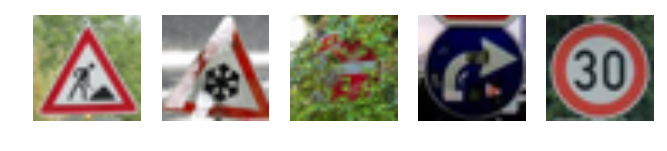

In [51]:
#load all images

TrafSign_NewImgDataset = TrafSign_initImage('data/new_img/*.jpg')


TrafSign_displayHoriImages(TrafSign_NewImgDataset)

In [60]:
model = KLab_Model_Cnn_Optim

TrafSign_NewImgDataset_Norm = KerasLab_nomalizeGlobalDataset(TrafSign_NewImgDataset)

KLab_NewImg_PrdctProb = model.predict_proba(TrafSign_NewImgDataset_Norm)
KLab_NewImg_PrdctClas = model.predict_classes(TrafSign_NewImgDataset_Norm)

5/5 [==============================] - 0s


In [95]:


def KLab_findTopk(preds, top_n=5):
    '''Decode the prediction.
    # Arguments
        preds: 2-dimensional numpy array
        top_n: integer in [0, 50], number of items to show
    # return:
        numpy array of prob
        numpy array of class index
    '''
    assert preds.ndim == 2 and preds.shape[1] == y_ClassNum
    
    ls_prob = []
    ls_clas_idx = []
    for pred in preds:
        prob = sorted(pred,reverse=True)
        clas_idx = sorted(range(len(pred)), key=lambda x: pred[x], reverse=True)
        ls_prob.append(prob[:top_n])
        ls_clas_idx.append(clas_idx[:top_n])
                      
    return np.array(ls_prob), np.array(ls_clas_idx)

In [89]:
def TraffSign_loadSignDict(file):

    import csv
    d = {}
    with open(file) as f:
        reader = csv.DictReader(f, delimiter=',')
        for row in reader:

            k=row['ClassId']
            v= row['SignName']
            d[k] = v
    return d

#img: an image
def TraffSign_visualizeSingleImgProbTable( np_img, ls_class, ls_probilities):
    
    plt.rcParams['figure.figsize'] = (15, 2) # width, height

    fig, axs =plt.subplots(1,2)
    clust_data = ls_probilities
    rowlable = ls_class
    tbl_pos_box=[.3, 0.3, .6, 0.5] #[left, bottom, width, height]
        
    axs[1].axis('tight')
    axs[1].axis('off')
    axs[1].table(   cellText=   clust_data,
                    rowLabels=rowlable,
                    loc='left',
                    bbox = tbl_pos_box,
                )

    axs[1].set_title('Prediction: {}'.format(ls_class[0]))
    
    axs[0].imshow(np_img)
    axs[0].axis('off')


    plt.show()  


    
def TraffSign_loadAllPredictedClassList(np_classes_idx, dict_sign):
    ls_class = []
    
    num = np_classes_idx.size
    
    for i in range(num):
        cls_idx = str(np_classes_idx[i])
        ls_class.append(dict_sign[cls_idx])
        
    return ls_class

def TraffSign_loadAllPredictedProbList(np_prob):
    num = np_prob.size
    
    ls_probilities= np_prob.reshape(num,1)
    
    return ls_probilities      
    

def TrafSign_visualizePredictionTable(dataset_img, matrix_class_idx, matrix_prob, dict_sign):
    
    num = matrix_class_idx.shape[0]
    
    for i in range(num):

        ls_classes = TraffSign_loadAllPredictedClassList(matrix_class_idx[i,:], dict_sign)

        ls_probilities = TraffSign_loadAllPredictedProbList(matrix_prob[i,:])

        TraffSign_visualizeSingleImgProbTable(dataset_img[i,:,:,:], 
                                   ls_classes ,
                                   ls_probilities,
                                )

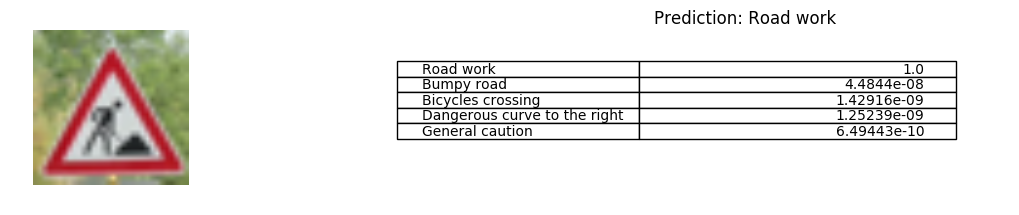

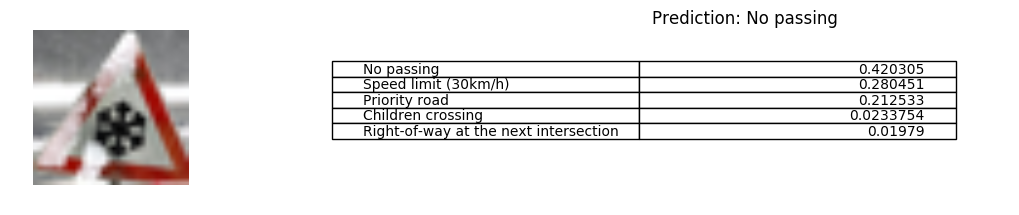

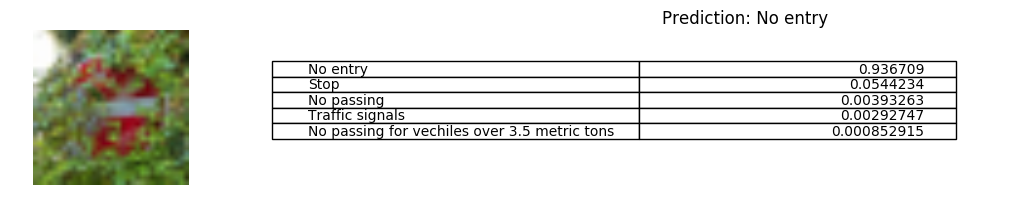

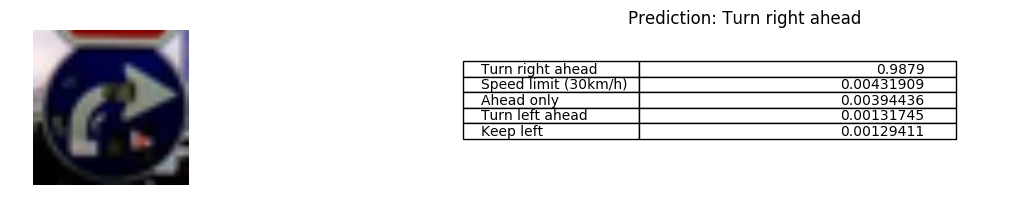

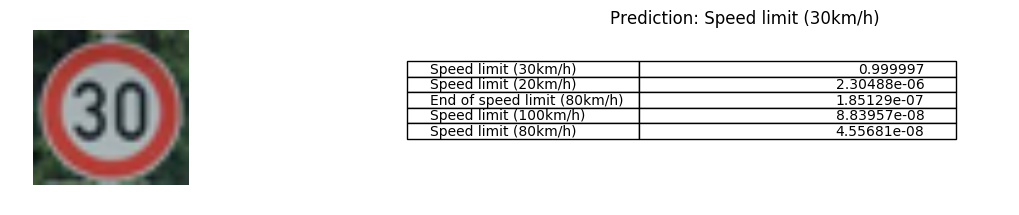

In [96]:
KLab_NewImg_ProbNp, KLab_NewImg_ClasNp = KLab_findTopk(KLab_NewImg_PrdctProb)

SignDict = TraffSign_loadSignDict('signnames.csv')

TrafSign_visualizePredictionTable(TrafSign_NewImgDataset, 
                                KLab_NewImg_ClasNp ,
                                KLab_NewImg_ProbNp,
                                SignDict,
                               )

## Summary
Keras is a great tool to use if you want to quickly build a neural network and evaluate performance.